In [818]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [819]:
car_df = pd.read_csv(
    "https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv",
    index_col=0,
)
car_df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [820]:
# большинство типов данных - object, надо провести спецификацию и заодно почистить
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

In [821]:
# убираем лишний текст, чтобы привести столбцы к вычисляемому типу
car_df["fuel_consumption_l_100km"] = car_df["fuel_consumption_l_100km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)
car_df["fuel_consumption_g_km"] = car_df["fuel_consumption_g_km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)

In [822]:
# чистим от нечисловых значений и неправильных дат
convert_to_num = [
    "price_in_euro",
    "power_kw",
    "power_ps",
    "fuel_consumption_l_100km",
    "fuel_consumption_g_km",
]
convert_to_dt = ["registration_date", "year"]

car_df[convert_to_num] = car_df[convert_to_num].apply(pd.to_numeric, errors="coerce")
car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")

# теперь датасет выглядит гораздо лучше и можно начать что-то делать с данными
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     251079 non-null  object        
 1   model                     251079 non-null  object        
 2   color                     250913 non-null  object        
 3   registration_date         250882 non-null  datetime64[ns]
 4   year                      250880 non-null  datetime64[ns]
 5   price_in_euro             250880 non-null  float64       
 6   power_kw                  250786 non-null  float64       
 7   power_ps                  250869 non-null  float64       
 8   transmission_type         251079 non-null  object        
 9   fuel_type                 251079 non-null  object        
 10  fuel_consumption_l_100km  223046 non-null  float64       
 11  fuel_consumption_g_km     214274 non-null  float64       
 12  mileage

/var/folders/mk/srk2d63n62qc5h8z461_xl000000gn/T/ipykernel_3422/3015630805.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")


In [823]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.078461
year                         0.079258
price_in_euro                0.079258
power_kw                     0.116696
power_ps                     0.083639
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    11.165012
fuel_consumption_g_km       14.658733
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [824]:
def cont_data(df):
    df = df[["price_in_euro", "power_kw", "power_ps", "fuel_consumption_l_100km", "fuel_consumption_g_km", "mileage_in_km"]]
    return df

cont_data(car_df).describe()   

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,2.508800e+05,250786.000000,250869.000000,223046.000000,214274.000000,2.509270e+05
mean,2.613753e+04,126.477379,171.809526,7.207217,143.286384,8.534002e+04
std,3.698795e+04,75.301763,99.192201,33.315899,72.777808,7.871706e+04
min,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.199000e+04,82.000000,111.000000,4.900000,116.000000,2.490400e+04
50%,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.750000e+04
75%,2.995000e+04,140.000000,190.000000,6.800000,163.000000,1.265000e+05
max,5.890500e+06,2023.000000,2022.000000,2023.000000,2023.000000,3.800000e+06


Максимальное значение потребления топлива и мощности очень похоже на год выпуска автомобиля. Проверим, так ли это

In [825]:
car_df[car_df['year'].isna()].head(10)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
2400,audi,Audi A4,grey,NaT,NaT,NaN,NaN,75.0,Manual,07/2004,187.0,2004.0,2460.0,Avant 1.6 *TÜV 09/23
2743,audi,Audi A4,silver,NaT,NaT,NaN,2005.0,NaN,Automatic,74.194 km,NaN,NaN,NaN,Lim. 2.0
5297,audi,Audi A1,blue,NaT,NaT,NaN,2011.0,NaN,Manual,110.250 km,NaN,NaN,NaN,1.4 TFSI Ambition
9616,audi,Audi A1,white,NaT,NaT,NaN,NaN,90.0,Manual,06/2014,128.0,2014.0,12250.0,Sportback Sportline
12206,audi,Audi A6,black,NaT,NaT,NaN,NaN,140.0,Manual,12/2016,119.0,2016.0,21250.0,Avant 2.0 TDI ultra
13554,audi,Audi A5,grey,NaT,NaT,NaN,NaN,NaN,Automatic,Automatic,2017.0,NaN,NaN,Sportback qu S-LINE PANO B&amp
13596,audi,Audi A4,grey,NaT,NaT,NaN,NaN,NaN,Automatic,Automatic,2017.0,NaN,NaN,quattro sport Avant - 3.0
16632,audi,Audi SQ2,blue,NaT,NaT,NaN,NaN,221.0,Automatic,12/2019,159.0,2019.0,31585.0,2.0 TFSI quattro S tronic
22673,audi,Audi Q8,white,NaT,NaT,NaN,NaN,250.0,Automatic,06/2023,415.0,2023.0,85990.0,Sportback S line 50 e-tron quattro
24574,bmw,BMW 316,silver,NaT,NaT,NaN,NaN,NaN,Manual,Manual,2003.0,NaN,NaN,316ti compact: TÜV


Как видно из таблицы выше - помимо года выпуска не хватает многих других данных и они тоже все перепутаны. Можно конечно подушнить и в полуручном режиме разнести эти данные, но КПД такого занятия будет крайне неэффективным. И так как % отсутствующих данных в целом по датафрейму довольно низок (кроме потребления топлива, к которым мы еще вернемся), то удаление этих строк не будет иметь негативного влияния на объективность анализа, а вполне возможно, что станет даже лучше.

И проверим как изменились основные параметры данных датафрейма

In [826]:
car_df = car_df.dropna(subset=["price_in_euro", "registration_date", "year", "power_kw", "power_ps"], how="any")
cont_data(car_df).describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,2.507520e+05,250752.000000,250752.000000,222840.000000,214076.000000,2.506920e+05
mean,2.611763e+04,126.221115,171.693618,6.764408,142.442164,8.537758e+04
std,3.685548e+04,72.018901,97.890860,17.479861,60.747560,7.872525e+04
min,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.199000e+04,82.000000,111.000000,4.900000,116.000000,2.495975e+04
50%,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.752900e+04
75%,2.995000e+04,140.000000,190.000000,6.800000,163.000000,1.265500e+05
max,5.890500e+06,735.000000,999.000000,739.000000,999.000000,3.800000e+06


In [827]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.066201
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.000000
power_ps                     0.000000
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    11.131317
fuel_consumption_g_km       14.626404
mileage_in_km                0.023928
offer_description            0.000000
dtype: float64

Проанализируем общее состояние каждого показателя, сравним "нормальное состояние" и "выбросы"

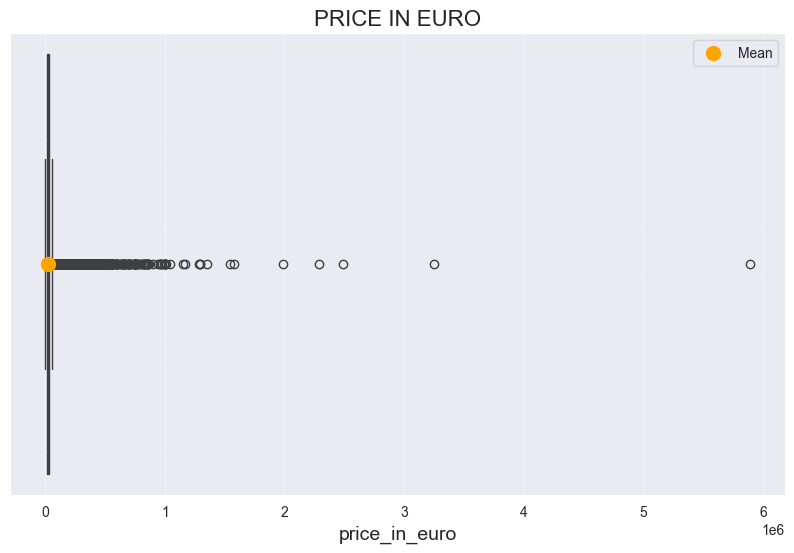

In [828]:
def box_plot(df, slc: list):
    for col in df.columns[slc]: # индекс списка - столбец с данными для анализа, для экономии места можно выбирать по необходимости, а не все сразу
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col], flierprops=dict(marker='o', color='red', markersize=6))
        
        plot_title = col.upper().replace("_", " ")
        
        plt.title(f'{plot_title}', fontsize=16)
        plt.xlabel(f'{col}', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        mean_value = df[col].mean()
        plt.scatter(mean_value, 0, color='orange', s=100, label='Mean', zorder=5)
        plt.legend()
        
        plt.show()

box_plot(cont_data(car_df),[0])        

 - На первый взгляд уверенно превалируют "выбросы". Надо разобраться в чем дело.
 - На барплоте видно, что существенно отличаются средние цены на бренды элитного сегмента, воспользуемся столбцом с доп.информацией, чтобы узнать возможную причину
 - Судя по пояснениям к маркам элитных брендов - это действительно редкие, штучные или коллекционные образцы, те то, что не является масс-маркетом и обладает выраженной индивидуальностью, поэтому цена скорее всего является реальной. Кроме того, остальные показатели, как мощность, потребление топлива и т.п. тоже существенно отличаются от масс-маркета (как правило в сильно большую сторону). Поэтому анализировать такие концепты нет смысла даже друг с другом. Далее проверим машины каких стоимостей не классифицируются как выбросы.

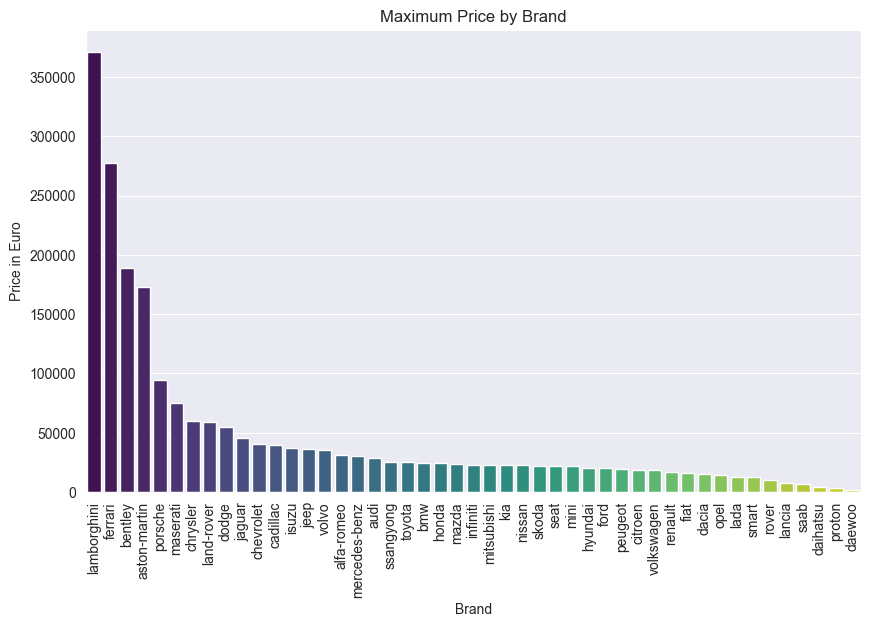

brand          offer_description                               
lamborghini    CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE    5890500.0
               Sian                                                3250000.0
mercedes-benz  722 MSO McLaren Edition 1 of 25 worldwide  Nr.12    2490000.0
aston-martin   One-77 I Bang Olufsen I Carbon I Q-Ausstattung      2289000.0
porsche        Spyder WEISSACH PAKET MAGNESIUM FELGEN              1990000.0
               CARRERA GT | NR. 1234 | UNIQUE COLOR COMBO          1580000.0
               1.Hd Deutsches Fahrzeug !! Mwst awb!!               1549000.0
               Carrera GTS Cabrio nur 27.000km Komfortpaket        1350000.0
               Spyder | Weissach-Package | service new             1290000.0
ferrari        *TDF 1of799*Ferrari-Dresden*                        1290000.0
aston-martin   V12 Speedster                                       1288000.0
               V12 Speedster 1 of 88                               1170000.0
ferrari     

In [829]:
max_prices_by_brand = car_df.groupby("brand")["price_in_euro"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=max_prices_by_brand.index, y=max_prices_by_brand.values, hue=max_prices_by_brand.index, palette="viridis", legend=False)
plt.title("Maximum Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Price in Euro")
plt.xticks(rotation=90)
plt.show()

elite_cars = car_df.groupby(["brand", "offer_description"])["price_in_euro"].max().sort_values(ascending=False)
elite_cars.head(20)

Чтобы наш ящик с усами по ценам выглядел нормально, а не тонкой линией с кучей выбросов - отрежем цены в "грубой форме" просто визуально по барплоту цен, пусть это будет 100k EUR

In [830]:
car_df = car_df[car_df["price_in_euro"] <= 100000]

Как мы видим, ящик стал выглядеть гораздо лучше и теперь нам надо просто убрать выбросы по правому усу

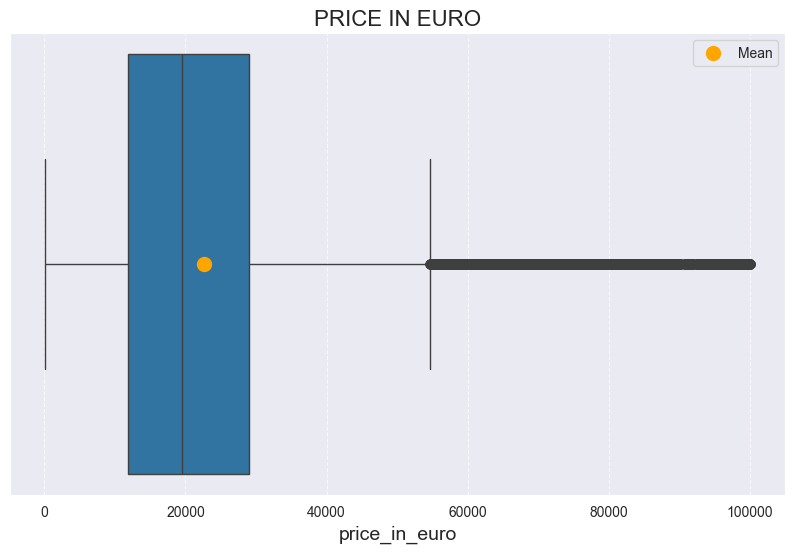

In [831]:
box_plot(cont_data(car_df),[0]) 

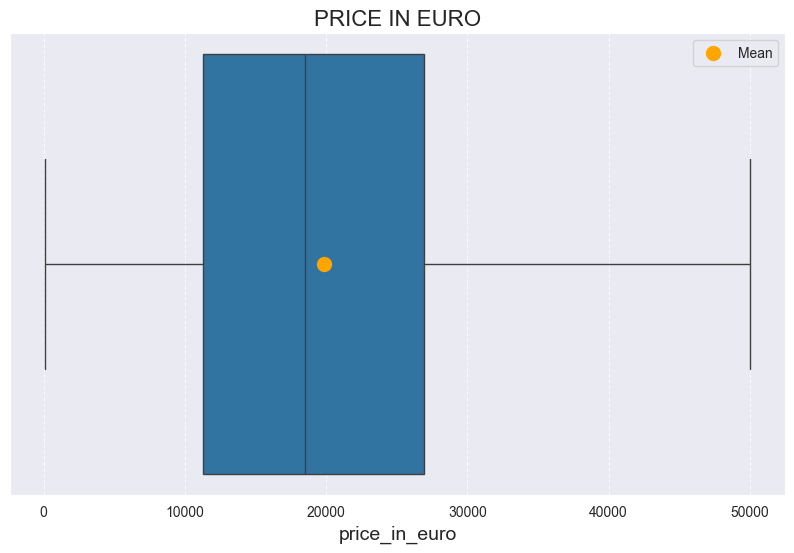

In [832]:
car_df_clr = car_df[car_df["price_in_euro"] <= 50000]
box_plot(cont_data(car_df_clr),[0])

Теперь у нас нет выбросов по цене, что значит мы смотрим на машины масс-маркета, без крутых индивидуализированных спорткаров. Сравним с первоначальным датафреймом - какой получился ущерб по данным в целом.

Ожидаемо - максимально поредели или исчезли элитно-преимальные бренды, однако костяк авто массового производства остался практичеки не поврежденным. Двигаемся дальше уже на этих очишенных данных

In [833]:
damage_check_df = pd.merge(car_df["brand"].value_counts(), car_df_clr["brand"].value_counts(), on="brand", how="left", suffixes=("_init", "_cleared"))
damage_check_df["data_reduction_%"] = (1 - damage_check_df["count_cleared"] / damage_check_df["count_init"]) * 100
damage_check_df.sort_values(by="data_reduction_%", ascending=False)

,count_init,count_cleared,data_reduction_%
brand,,,
aston-martin,95,17.0,82.105263
chrysler,32,10.0,68.750000
bentley,126,40.0,68.253968
porsche,2672,1045.0,60.890719
maserati,565,248.0,56.106195
dodge,640,330.0,48.437500
land-rover,2791,1604.0,42.529559
jaguar,1362,995.0,26.945668
chevrolet,188,146.0,22.340426


После очистки от относительно немногочисленных дорогих машин наш датасет все еще выглядит подозрительно - с ценой все хорошо, а вот максимальные и минимальные данные по мощности двигателя и потреблению топлива выглядят странно.

In [834]:
cont_data(car_df_clr).describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,230905.000000,230905.000000,230905.000000,206827.000000,196546.000000,2.308460e+05
mean,19839.819441,113.494532,154.394171,6.415293,136.603621,8.992299e+04
std,11211.088602,49.741204,67.600221,14.910188,51.590641,7.970460e+04
min,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,11299.000000,81.000000,110.000000,4.900000,115.000000,2.939650e+04
50%,18500.000000,103.000000,140.000000,5.600000,133.000000,7.300000e+04
75%,26950.000000,135.000000,184.000000,6.600000,157.000000,1.330000e+05
max,50000.000000,703.000000,956.000000,701.000000,999.000000,3.800000e+06


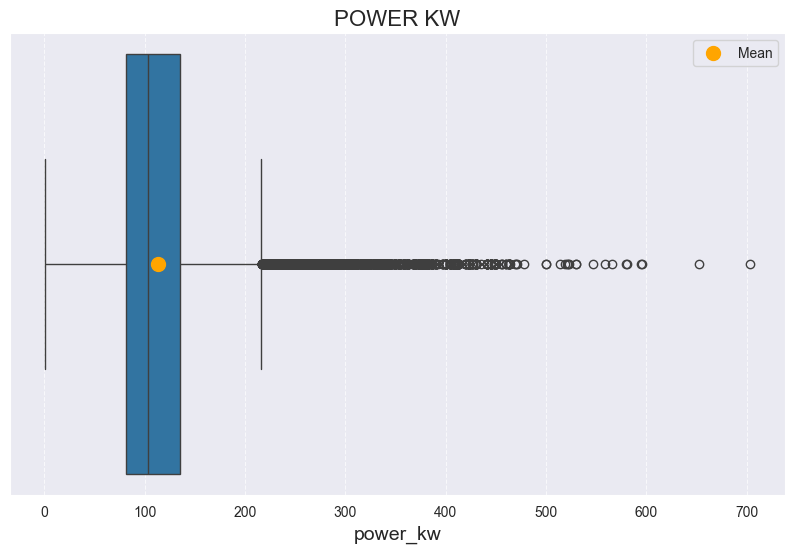

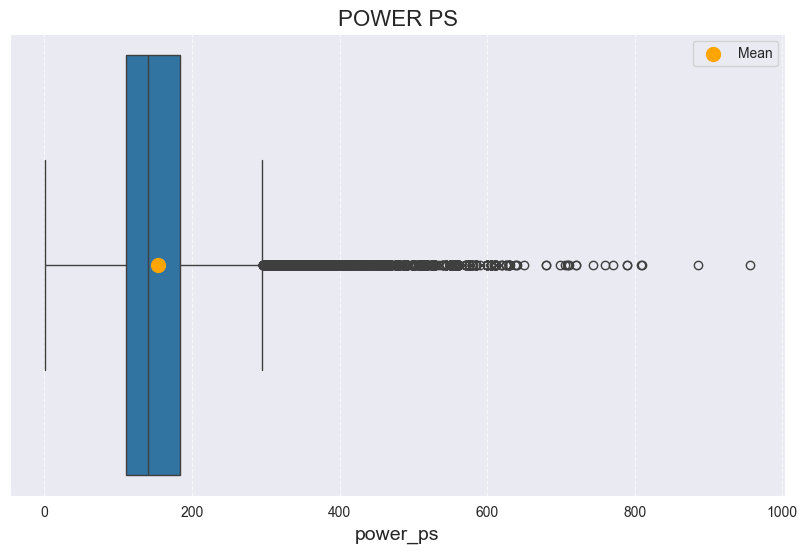

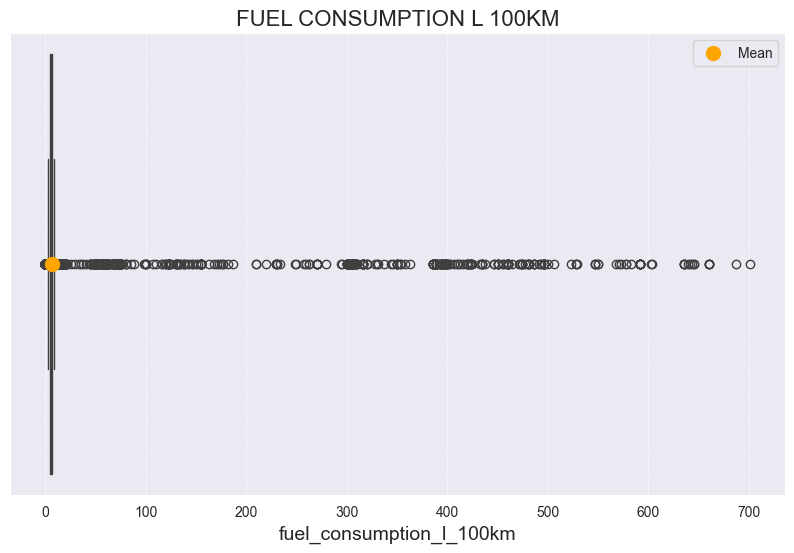

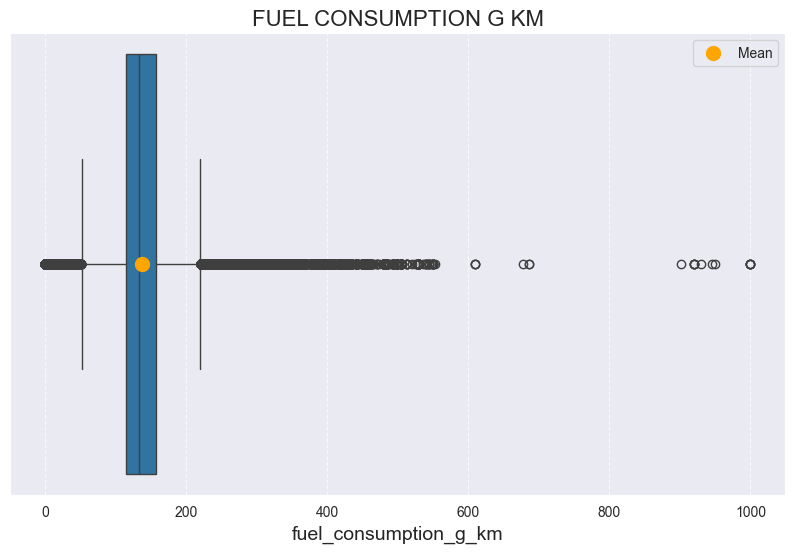

In [835]:
box_plot(cont_data(car_df_clr),[1, 2, 3, 4])

Как мы видим по техническим параметрам выбросы очень обширные и свалить все на элитный автопром уже не получится, будем искать по категориальным значениям

In [836]:
car_df_clr

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1995-01-01,1300.0,148.0,201.0,Manual,Petrol,10.9,260.0,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,1995-01-01,24900.0,191.0,260.0,Manual,Petrol,NaN,NaN,190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,1995-02-01,1995-01-01,5900.0,110.0,150.0,Unknown,Petrol,NaN,NaN,129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,1995-01-01,4900.0,110.0,150.0,Manual,Petrol,9.5,225.0,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,1996-01-01,17950.0,132.0,179.0,Manual,Petrol,7.2,NaN,96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251058,volvo,Volvo XC40,silver,2023-03-01,2023-01-01,38400.0,120.0,163.0,Automatic,Petrol,6.6,166.0,2328.0,Core B3 Aut. EU6d Kamera Navi LED
251061,volvo,Volvo XC40,silver,2023-02-01,2023-01-01,38200.0,120.0,163.0,Automatic,Petrol,6.6,166.0,2182.0,Core B3 Aut. EU6d Kamera Navi LED
251062,volvo,Volvo V60,silver,2023-02-01,2023-01-01,50000.0,145.0,197.0,Automatic,Petrol,6.3,143.0,6047.0,B4 Plus Dark Fahrassistenz Paket
251065,volvo,Volvo XC40,silver,2023-02-01,2023-01-01,37900.0,120.0,163.0,Automatic,Petrol,6.6,166.0,2145.0,Core B3 Aut. EU6d Kamera Navi LED
